<a href="https://colab.research.google.com/github/t120524/AI/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 25.9 MB/s eta 0:00:00


In [4]:
!pip uninstall vietocr Pillow
!pip install vietocr Pillow==9.5.0

Found existing installation: vietocr 0.3.13
Uninstalling vietocr-0.3.13:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/config/*
    /usr/local/lib/python3.11/dist-packages/vietocr-0.3.13.dist-info/*
    /usr/local/lib/python3.11/dist-packages/vietocr/*
Proceed (Y/n)? y
  Successfully uninstalled vietocr-0.3.13
Found existing installation: pillow 10.2.0
Uninstalling pillow-10.2.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/PIL/*
    /usr/local/lib/python3.11/dist-packages/pillow-10.2.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libbrotlicommon-3ecfe81c.so.1
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libbrotlidec-ba690955.so.1
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libfreetype-f154df84.so.6.20.1
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libharfbuzz-2093a78b.so.0.60830.0
    /usr/local/lib/python3.11/dist-packa

# Inference

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [3]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [4]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [5]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:12, 1435.61it/s]


In [6]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2025-04-01 03:33:35--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K   600KB/s    in 0.5s    

2025-04-01 03:33:36 (600 KB/s) - ‘sample.zip’ saved [305969/305969]



In [7]:
! ls sample | shuf |head -n 5

4448.jpg
deskewed-2019_09_16_nguyen_thi_hoai_thanh_2019091614580813_18.jpg
2019_10_04_tran_quang_dung_201910041118369_29.jpg
55611.jpg
13221_16.jpg.jpg


'VŨ THUỲ NINH'

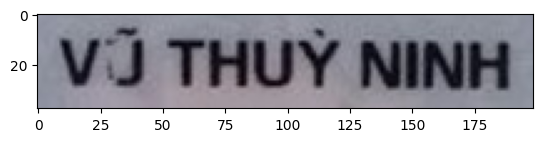

In [8]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [9]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-04-01 03:34:33--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  17.1MB/s    in 4.3s    

2025-04-01 03:34:38 (13.6 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [10]:
! unzip -qq -o ./data_line.zip

In [10]:
!pip install numpy==1.23.5



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.2 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have nump

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [1]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [2]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [3]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/seq2seqocr_checkpoint.pth',
          'export':'./weights/seq2seqocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [4]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/seq2seqocr.pth',
  'checkpoint': './checkpoint/seq2seqocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory': True

You should train model from our pretrained

In [5]:
trainer = Trainer(config, pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 137001.95it/s]

valid_hw exists. Remove folder if you want to create new dataset



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 149778.86it/s]


Save model configuration for inference, load_config_from_file

In [6]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

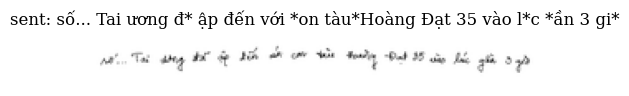

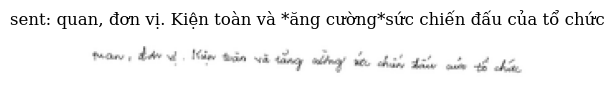

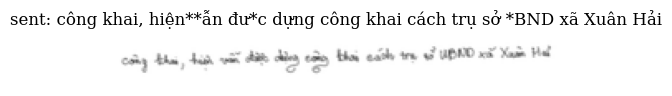

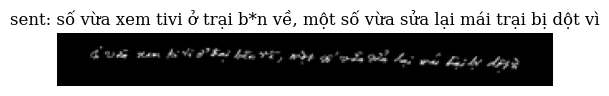

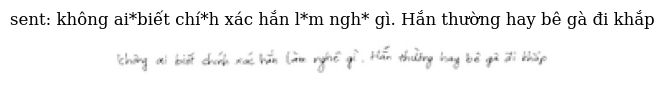

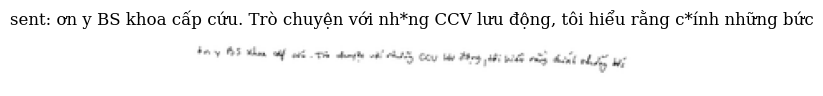

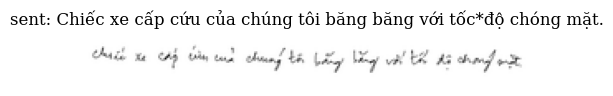

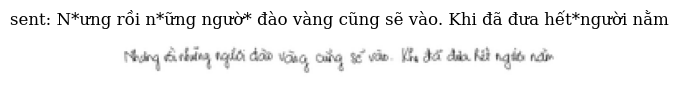

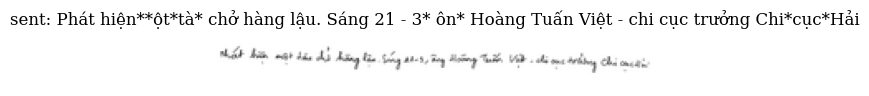

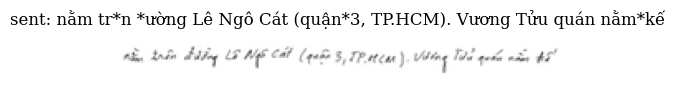

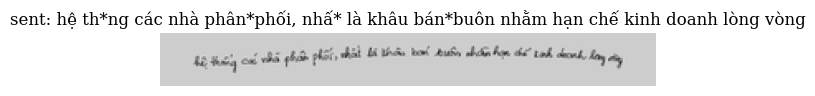

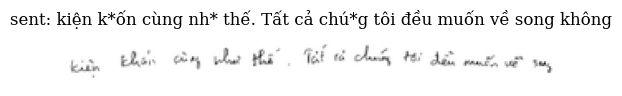

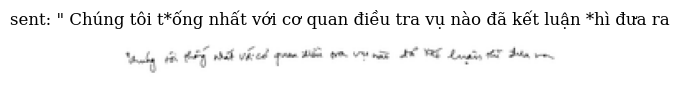

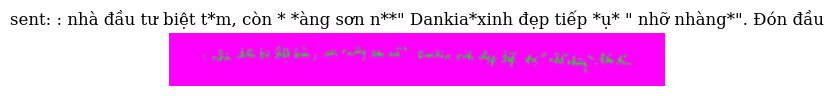

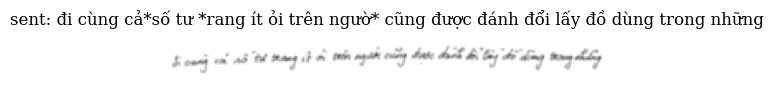

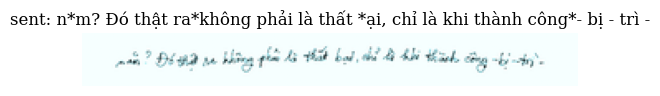

In [7]:
trainer.visualize_dataset()

Train now

In [8]:
trainer.train()

iter: 000200 - train loss: 1.441 - lr: 6.35e-05 - load time: 2.07 - gpu time: 133.06
iter: 000400 - train loss: 1.230 - lr: 1.32e-04 - load time: 1.25 - gpu time: 133.22
iter: 000600 - train loss: 1.125 - lr: 2.38e-04 - load time: 1.13 - gpu time: 130.34
iter: 000800 - train loss: 1.054 - lr: 3.72e-04 - load time: 2.53 - gpu time: 130.61
iter: 001000 - train loss: 1.009 - lr: 5.20e-04 - load time: 1.44 - gpu time: 134.27
iter: 001200 - train loss: 0.974 - lr: 6.69e-04 - load time: 1.31 - gpu time: 133.34
iter: 001400 - train loss: 0.947 - lr: 8.03e-04 - load time: 2.44 - gpu time: 131.34
iter: 001600 - train loss: 0.921 - lr: 9.09e-04 - load time: 1.27 - gpu time: 133.51
iter: 001800 - train loss: 0.913 - lr: 9.77e-04 - load time: 1.29 - gpu time: 134.79
iter: 002000 - train loss: 0.896 - lr: 1.00e-03 - load time: 1.26 - gpu time: 128.00
iter: 002200 - train loss: 0.865 - lr: 1.00e-03 - load time: 2.47 - gpu time: 131.28
iter: 002400 - train loss: 0.862 - lr: 9.99e-04 - load time: 1.32

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()